In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

In [17]:
def plot_te_all(ttle, eta, n_tasks, n_alg, alg_name):
    fig, ax = plt.subplots(1,1, figsize=(8,8))
    clr = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]
    c = sns.color_palette(clr, n_colors=5)
    for i in range(n_tasks - 1):
        
        et = np.zeros((n_alg,n_tasks-i))
        
        for j in range(0,n_alg):
            et[j,:] = np.asarray(eta[j][i])
        
        ns = np.arange(i + 1, n_tasks + 1)
        for j in range(0,n_alg):
            if j == 0:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j], linewidth = 2.6)
                else:
                    ax.plot(ns, et[j,:], c=c[j], linewidth = 2.6)
            else:
                if i == 0:
                    ax.plot(ns, et[j,:], label = alg_name[j], c=c[j])
                else:
                    ax.plot(ns, et[j,:], c=c[j])
    
    
    ax.set_title(ttle, fontsize=20)
    ax.set_xlabel('Number of tasks seen', fontsize=18)
    ax.set_ylabel('Backward Transfer Efficiency', fontsize=18)
    # ax.set_ylim(0.05 - 0.01, 0.5 + 0.01)
    # box = ax.get_position()
    # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.legend(loc='upper left', fontsize=12)
    ax.set_yticks([.5,.6,.7,.8,.9,1, 1.1, 1.2, 1.3])
    ax.set_xticks(np.arange(1,11))
    ax.tick_params(labelsize=14)
    ax.grid(axis='x')
    plt.tight_layout()
    
    plt.savefig('cifar-100-RTE.pdf')

In [18]:
def calc_rte(err, ntasks):
    task_err = [[err[i][0]/err[i][j] for j in range(0,ntasks-i)] for i in range(0,ntasks)]
    
    return task_err

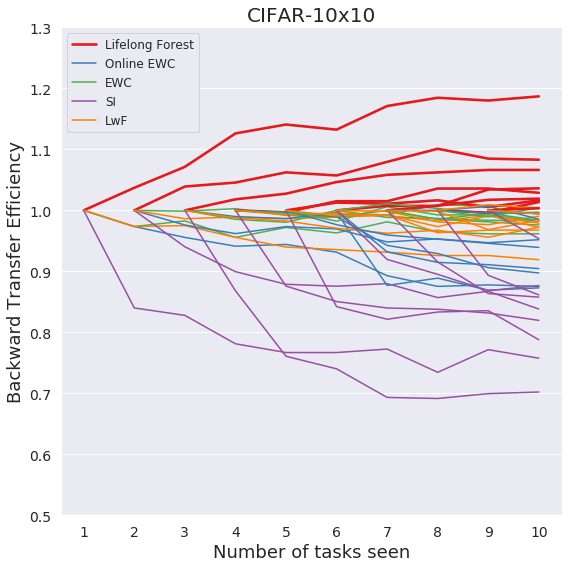

In [19]:
err_L2F = [[0.616,0.594,0.575,0.547,0.54,0.544,0.526,0.52,0.522,0.519],
           [0.665,0.64,0.636,0.626,0.629,0.616,0.604,0.613,0.614],
           [0.563,0.553,0.548,0.538,0.532,0.53,0.528,0.528],
           [0.608,0.61,0.599,0.599,0.587,0.587,0.591],
           [0.555,0.548,0.549,0.546,0.552,0.546],
           [0.545,0.541,0.541,0.527,0.526],
           [0.53,0.526,0.521,0.52],
           [0.521,0.523,0.514],
           [0.575, 0.573],
           [0.482]]
err_online_ewc = [[0.625,0.642,0.654,0.664,0.662,0.671,0.7,0.714,0.712,0.714], [0.732,0.75,0.761,0.752,0.755,0.772,0.7679,0.773,0.769],
                  [0.584,0.59,0.592,0.586,0.666,0.657,0.672,0.669], [0.656,0.658,0.663,0.696,0.706,0.724,0.731],
                  [0.665,0.681,0.693,0.698,0.703,0.708], [0.644,0.691,0.704,0.707,0.712],
                  [0.617,0.617,0.613,0.626], [0.66,0.663,0.663], [0.695,0.699], [0.635]]

err_ewc = [[0.625,0.642,0.636,0.654,0.643,0.649,0.637,0.648,0.65,0.65], [0.73,0.731,0.728,0.736,0.738,0.73,0.741,0.744,0.748],
           [0.603,0.612,0.615,0.603,0.61,0.611,0.613,0.613], [0.672,0.675,0.676,0.677,0.666,0.667,0.669],
           [0.666,0.678,0.662,0.671,0.671,0.678], [0.649,0.642,0.647,0.652,0.651],
           [0.607,0.616,0.61,0.617], [0.644,0.651,0.641], [0.71, 0.714], [0.652]]

err_SI = [[0.625,0.744,0.755,0.8,0.815,0.815,0.809,0.851,0.81,0.825], [0.725,0.771,0.806,0.825,0.828,0.824,0.846,0.836,0.865],
          [0.547,0.63,0.719,0.739,0.789,0.791,0.782,0.779], [0.677,0.773,0.796,0.806,0.808,0.814,0.826],
          [0.635,0.754,0.773,0.762,0.76,0.806], [0.64,0.696,0.715,0.737,0.73], [0.627,0.685,0.726,0.731],
          [0.646,0.723,0.75], [0.72,0.755], [0.624]]

err_LwF = [[0.625,0.642,0.641,0.654,0.665,0.668,0.671,0.675,0.675,0.68], [0.722,0.732,0.73,0.732,0.73,0.728,0.735,0.728,0.743],
           [0.564,0.571,0.574,0.581,0.586,0.583,0.59,0.58], [0.658,0.663,0.661,0.663,0.683,0.68,0.68],
           [0.656,0.662,0.661,0.674,0.662,0.67], [0.624,0.625,0.636,0.639,0.63], [0.612,0.613,0.632,0.622],
           [0.651,0.645,0.649], [0.702,0.706], [0.608]]

plt_rte = [calc_rte(err_L2F,10), calc_rte(err_online_ewc,10), calc_rte(err_ewc,10), calc_rte(err_SI,10), calc_rte(err_LwF,10)]
names = ['Lifelong Forest', 'Online EWC', 'EWC', 'SI', 'LwF']
'Online EWC on CIFAR-10x10'
#plot_te('Online EWC on CIFAR-10x10',eta_online_ewc,10)
#plot_te('EWC on CIFAR-10x10',eta_ewc,10)
plot_te_all('CIFAR-10x10',plt_rte,10,5,names)

In [16]:
print(calc_rte(err_ewc,10))

[[1.0, 0.9735202492211837, 0.9827044025157232, 0.9556574923547401, 0.9720062208398134, 0.963020030816641, 0.9811616954474097, 0.9645061728395061, 0.9615384615384615, 0.9615384615384615], [1.0, 0.9986320109439124, 1.0027472527472527, 0.9918478260869565, 0.9891598915989159, 1.0, 0.9851551956815114, 0.9811827956989247, 0.9759358288770054], [1.0, 0.9852941176470588, 0.9804878048780488, 1.0, 0.9885245901639345, 0.9869067103109657, 0.9836867862969004, 0.9836867862969004], [1.0, 0.9955555555555555, 0.9940828402366864, 0.9926144756277696, 1.009009009009009, 1.0074962518740629, 1.0044843049327354], [1.0, 0.9823008849557522, 1.0060422960725075, 0.992548435171386, 0.992548435171386, 0.9823008849557522], [1.0, 1.0109034267912773, 1.0030911901081916, 0.995398773006135, 0.9969278033794163], [1.0, 0.9853896103896104, 0.9950819672131147, 0.9837925445705025], [1.0, 0.989247311827957, 1.0046801872074882], [1.0, 0.9943977591036415], [1.0]]
